# Data Exploration

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [253]:
df = pd.read_csv('./example_data/iceland/files/region_monthly.csv')

In [254]:
df

,MONTH,ID,POINT_ID,YEAR,N_MONTHS,POINT_LON,POINT_LAT,POINT_BALANCE,ALTITUDE_CLIMATE,ELEVATION_DIFFERENCE,aspect,slope,t2m,tp,slhf,sshf,ssrd,fal,str
0,oct,0,hn14aa,1995,7,-18.773871,64.885013,2.07,1333.923612,-116.476388,1.606406,0.056246,267.885682,0.005071,-32688.346894,1.908546e+05,3.434260e+06,0.850005,-1.029337e+06
1,nov,0,hn14aa,1995,7,-18.773871,64.885013,2.07,1333.923612,-116.476388,1.606406,0.056246,266.376346,0.006053,301104.083653,8.280538e+05,8.424995e+05,0.849992,-1.431540e+06
2,dec,0,hn14aa,1995,7,-18.773871,64.885013,2.07,1333.923612,-116.476388,1.606406,0.056246,263.049011,0.005854,248241.745197,9.954409e+05,1.322171e+05,0.849992,-2.002829e+06
3,jan,0,hn14aa,1995,7,-18.773871,64.885013,2.07,1333.923612,-116.476388,1.606406,0.056246,261.692810,0.004156,348585.225978,1.243700e+06,4.884578e+05,0.849992,-1.792889e+06
4,feb,0,hn14aa,1995,7,-18.773871,64.885013,2.07,1333.923612,-116.476388,1.606406,0.056246,261.140088,0.002287,274514.643950,1.004845e+06,2.580602e+06,0.850005,-1.861757e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,jun,56,blt8,2018,11,-18.954942,64.662707,-2.63,1067.593874,246.593874,2.889730,0.018996,276.144439,0.003192,10994.304045,6.234279e+05,1.787212e+07,0.768536,-9.177811e+05
443,jul,56,blt8,2018,11,-18.954942,64.662707,-2.63,1067.593874,246.593874,2.889730,0.018996,277.553280,0.003422,-589325.605420,7.537638e+04,1.425122e+07,0.676787,-7.246837e+05
444,aug,56,blt8,2018,11,-18.954942,64.662707,-2.63,1067.593874,246.593874,2.889730,0.018996,276.193729,0.002495,-807105.778219,-1.563324e+05,1.332676e+07,0.677706,-1.884936e+06
445,sep,56,blt8,2018,11,-18.954942,64.662707,-2.63,1067.593874,246.593874,2.889730,0.018996,273.151130,0.003491,-432479.565272,1.434597e+05,9.078256e+06,0.717923,-2.152404e+06


In [293]:
df.columns

Index(['MONTH', 'ID', 'POINT_ID', 'YEAR', 'N_MONTHS', 'POINT_LON', 'POINT_LAT',
       'POINT_BALANCE', 'ALTITUDE_CLIMATE', 'ELEVATION_DIFFERENCE', 'aspect',
       'slope', 't2m', 'tp', 'slhf', 'sshf', 'ssrd', 'fal', 'str'],
      dtype='object')

In [255]:
# Group by 'POINT_ID' and apply the function to get the required lists
result = df.groupby('POINT_ID').apply(lambda x: {
    'YEARS': x['YEAR'].unique().tolist(),
    'POINT_BALANCES': x.drop_duplicates('YEAR')['POINT_BALANCE'].tolist(),
}, include_groups=False).reset_index().rename(columns={0: 'data'})

In [256]:
# Group by YEAR and apply function to calculate mean and std after removing duplicates
stats_results = df.groupby('YEAR').apply(
    lambda x: pd.Series({
        'MEAN_POINT_BALANCE': x.drop_duplicates(subset=['POINT_BALANCE'])['POINT_BALANCE'].mean(),
        'STD_POINT_BALANCE': x.drop_duplicates(subset=['POINT_BALANCE'])['POINT_BALANCE'].std()
    })
, include_groups=False).reset_index()

In [276]:
# Group by YEAR and apply function to calculate mean and std after removing duplicates
agg_results = df.groupby('YEAR').apply(
    lambda x: pd.Series({
        'SUM_POINT_BALANCE': x.drop_duplicates(subset=['POINT_BALANCE'])['POINT_BALANCE'].sum(),
    })
, include_groups=False).reset_index()

In [277]:
agg_results['SUM_POINT_BALANCE'] = agg_results['SUM_POINT_BALANCE'].cumsum()

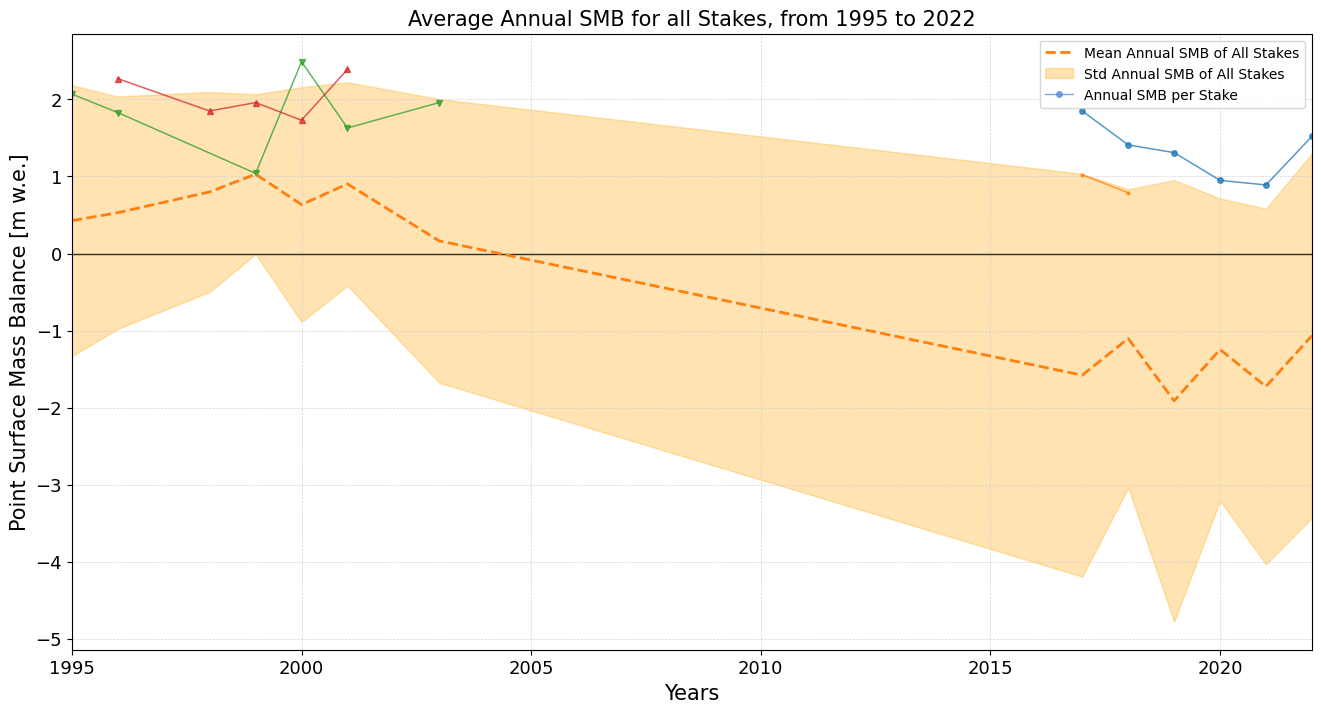

In [366]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(np.arange(np.min(stats_results.YEAR), np.max(stats_results.YEAR) + 1), np.zeros(np.max(stats_results.YEAR) - np.min(stats_results.YEAR) + 1), color='#2e2e2e', linewidth=1)

import itertools

markers = itertools.cycle(('o', '.', 'v', '^', '<', '>', '8', 's', 'p', 'P', 'd', 'X', '+', '*'))

# Loop through the result DataFrame to plot each POINT_ID's data
for _, row in result.iterrows():
    value = row['data']
    plt.plot(value['YEARS'], value['POINT_BALANCES'], marker=next(markers), markevery=1, markersize=4, alpha=0.75, linewidth=1.1)
    
plt.plot(
    stats_results.YEAR,
    stats_results.MEAN_POINT_BALANCE,
    linestyle='--',
    color='#ff7f0e',
    label='Mean Annual SMB of All Stakes',
    linewidth=2
)

std_amb = ax.fill_between(
    stats_results.YEAR, 
    stats_results.MEAN_POINT_BALANCE - stats_results.STD_POINT_BALANCE, 
    stats_results.MEAN_POINT_BALANCE + stats_results.STD_POINT_BALANCE, 
    color='orange',
    alpha=0.3,
    label='Std Annual SMB of All Stakes'
)

ax.plot(np.NaN, np.NaN, '-',  marker='o', markevery=1, markersize=4, alpha=0.75, color='#4e8cd9', linewidth=1, label='Annual SMB per Stake')

ax.set_xlim(left=np.min(stats_results.YEAR), right=np.max(stats_results.YEAR))

ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.title(f'Average Annual SMB for all Stakes, from {np.min(stats_results.YEAR)} to {np.max(stats_results.YEAR)}', fontsize=15)
# Add labels and legend
ax.set_xlabel('Years', fontsize=15)
ax.set_ylabel('Point Surface Mass Balance [m w.e.]', fontsize=15)
ax.legend()

ax.grid(which='major', color='lightgray', linestyle='--', linewidth=0.5)
# Show the plot
plt.show()

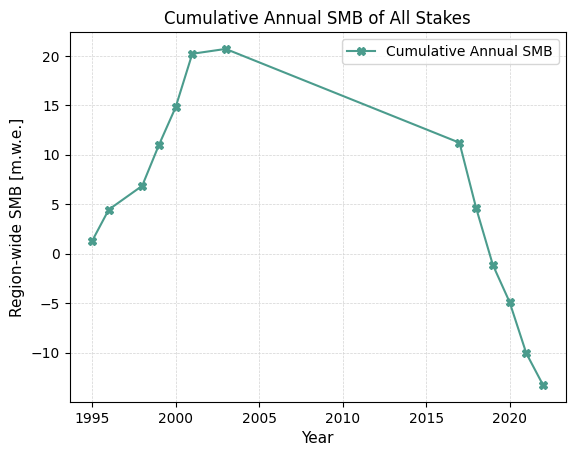

In [356]:
agg_results.plot(x='YEAR', y='SUM_POINT_BALANCE', marker='X', markevery=1, markersize=6, linewidth=1.5, color='#4b9c8d',label='Cumulative Annual SMB')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Region-wide SMB [m.w.e.]', fontsize=11)
plt.title('Cumulative Annual SMB of All Stakes', fontsize=12)
plt.grid(which='major', color='lightgray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()